In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy


## Questions for understanding each dataset

• What are the average stats for players in the top 5 conferences?

• Are there differences in stats across conferences (e.g., average points, assists)?

• How many players transitioned to the NBA from each conference?

In [151]:
acc_df = pd.read_csv('acc_career_avg_.csv', index_col= 0)
big_12_df = pd.read_csv('big_12_career_avg.csv', index_col= 0)
pac_10_df = pd.read_csv('pac_10_career_avg.csv', index_col= 0)
pac_12_df = pd.read_csv('pac_12_career_avg.csv', index_col= 0)
sec_df = pd.read_csv('sec_career_avg_.csv', index_col= 0)
big_10_df = pd.read_csv('big_10_career_avg_.csv', index_col= 0)

In [152]:
# concatenating these two dfs since they're part of the same conference, just different names
pac_12_df_abs = pd.concat([pac_12_df, pac_10_df])

In [153]:
"""
want to concatenate each college df into one big dataframe so I can compare 
it to the NBA dataframe so I'm adding conference labels to each player in the dataframes
"""

acc_label_df = acc_df
acc_label_df['conference'] = 'ACC'

big_10_label_df = big_10_df
big_10_label_df['conference'] = 'Big 10'

big_12_label_df = big_12_df
big_12_label_df['conference'] = 'Big 12'

pac_12_abs_label_df = pac_12_df_abs
pac_12_df_abs['conference'] = 'PAC-12'

sec_label_df = sec_df
sec_label_df['conference'] = 'SEC'

In [154]:
NBA_career_avg_df = pd.read_csv('NBA_career_averages.csv', index_col= 0)

In [155]:
college_career_avg_df = acc_label_df
college_career_avg_df= pd.concat([college_career_avg_df, big_10_label_df])
college_career_avg_df= pd.concat([college_career_avg_df, big_12_label_df])
college_career_avg_df= pd.concat([college_career_avg_df, pac_12_abs_label_df])
college_career_avg_df= pd.concat([college_career_avg_df, sec_label_df])

In [156]:
summary_stats_all_colleges_2 = college_career_avg_df.groupby('conference')[['pts', 'ast', 'trb']].mean().reset_index()

In [157]:
summary_stats_all_colleges_2

,conference,pts,ast,trb
0,ACC,9.450163,1.789009,4.062359
1,Big 10,9.102105,1.797980,3.903300
2,Big 12,9.360966,1.848551,4.035944
3,PAC-12,9.328380,1.805636,3.973815
4,SEC,9.379231,1.736237,4.005633


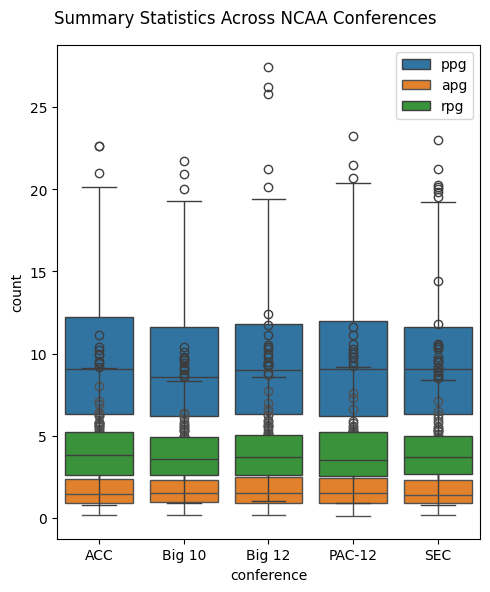

In [282]:
import seaborn as sns

plt.figure(figsize=(5, 6)).set_facecolor('white')


sns.boxplot(x='conference', y='pts', data=college_career_avg_df, label = 'ppg')
sns.boxplot(x='conference', y='ast', data=college_career_avg_df, label = 'apg')
sns.boxplot(x='conference', y='trb', data=college_career_avg_df, label = 'rpg')

plt.ylabel('count')
plt.suptitle('Summary Statistics Across NCAA Conferences')
plt.legend()

plt.tight_layout()
plt.savefig('Summary Statistics Across NCAA Conferences')
plt.show()

It's quite interesting to see that there's not much of a substantial difference in statistics for each conference. As in there's almost no change between any stats. Each conference seems to all average out to about (9 ppg, 2 apg, 4rpg). There isn't much of a difference in five-number summary between any of the conferences either. Although these are the top 5 conferences in the NCAA, perhaps there may be a bigger difference to see when these averages are compared to lower regarded conferences. 

It is also interesting to see that each conference prioritizes scoring over any other facet of the game. 

#### Quick summary:


• No big difference in statistics between each conference

• Could be bigger difference when compared to worse conferences in NCAA

• All 5 conferences have a tendency to score over assist and rebound

In [159]:
"""
the isin method will return me a dataframe of booleans that says if a player 
from the college dataframe is in the nba dataframe

this way I can merge the 'player' column from the college data and see 2 things:

1) which players in the college data made it to the NBA?

2) which conference is each player in? 
"""

is_in_NBA_df = college_career_avg_df['player'].isin(NBA_career_avg_df['player']).to_frame()
is_in_NBA_df.columns = ['in_nba']

In [160]:
is_in_NBA_df = pd.concat([college_career_avg_df[['player', 'conference']], is_in_NBA_df], axis = 1)

In [161]:
college_career_avg_df

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,fg,fga,fg%,efg%,ft,fta,ft%,conference
0,Zion Williamson,22.60,2.10,8.90,3.50,5.40,2.10,1.80,2.40,33.00,30.00,9.00,13.20,0.68,0.71,3.90,6.20,0.64,ACC
1,R.J. Barrett,22.60,4.30,7.60,1.60,6.00,0.90,0.40,3.20,38.00,35.30,8.40,18.50,0.45,0.51,3.90,5.90,0.66,ACC
2,Marvin Bagley III,21.00,1.50,11.10,4.00,7.10,0.80,0.90,2.30,33.00,33.90,8.20,13.30,0.61,0.64,4.00,6.30,0.63,ACC
3,Tyler Hansbrough,20.15,1.10,8.50,3.40,5.15,1.25,0.48,2.10,35.50,30.90,6.60,12.30,0.54,0.54,6.88,8.72,0.79,ACC
4,J.J. Redick,19.88,2.20,2.72,0.48,2.22,1.10,0.10,2.12,34.75,34.05,5.90,13.70,0.43,0.55,4.75,5.22,0.92,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,Darius Thompson,2.50,2.40,2.00,0.30,1.70,1.00,0.20,0.90,37.00,16.80,0.90,2.30,0.38,0.43,0.60,0.80,0.73,SEC
1128,Kevin Brophy,2.35,1.35,1.10,0.10,1.05,0.60,0.00,0.75,23.00,16.40,0.80,2.20,0.30,0.42,0.25,0.50,0.45,SEC
1163,John Florveus,2.15,0.30,2.50,1.00,1.45,0.25,0.65,0.85,30.00,15.20,0.95,2.00,0.45,0.45,0.35,0.70,0.48,SEC
1225,Oliver Black,1.80,0.30,2.40,0.80,1.60,0.40,0.30,0.80,31.00,15.80,0.70,1.50,0.49,0.49,0.40,0.90,0.44,SEC


In [162]:
"""
I see a problem here, it's saying R.J. Barrett and J.J. Reddick aren't in the NBA. 
I know this is wrong since RJ and JJ are notable players that
had good college careers. 
"""
is_in_NBA_df


,player,conference,in_nba
0,Zion Williamson,ACC,True
1,R.J. Barrett,ACC,False
2,Marvin Bagley III,ACC,True
3,Tyler Hansbrough,ACC,True
4,J.J. Redick,ACC,False
...,...,...,...
1103,Darius Thompson,SEC,False
1128,Kevin Brophy,SEC,False
1163,John Florveus,SEC,False
1225,Oliver Black,SEC,False


In [163]:
NBA_career_avg_df[NBA_career_avg_df['player'] =='JJ Redick']

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,fg,fga,fg%,efg%,ft,fta,ft%
240,JJ Redick,11.73,1.96,1.89,0.17,1.73,0.42,0.09,1.09,55.89,23.96,3.92,8.92,0.43,0.54,1.98,2.21,0.89


In [164]:
NBA_career_avg_df[NBA_career_avg_df['player'] =='RJ Barrett']

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,fg,fga,fg%,efg%,ft,fta,ft%
58,RJ Barrett,17.88,2.85,5.4,0.88,4.5,0.68,0.25,2.12,67.75,33.42,6.42,15.23,0.42,0.47,3.45,4.88,0.7


In [165]:
"""
I can see that the way people who have a first name that contain mere initials are spelled differently between datasets. RJ Barrett and JJ Redick on the NBA dataset are R.J. Barett and J.J. Redick on the college dataset. 
I'm going to try and account for every possibility of that happening and standardize their names. 

First I'll strip the whitespace out of all player names

Then I'm replacing all instances of a period with a blank
"""
NBA_career_avg_df['player'] = NBA_career_avg_df['player'].str.strip()
college_career_avg_df['player'] = college_career_avg_df['player'].str.strip()
NBA_career_avg_df['player'] = NBA_career_avg_df['player'].str.replace('.', '')
college_career_avg_df['player'] = college_career_avg_df['player'].str.replace('.', '')

/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/2910110921.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  NBA_career_avg_df['player'] = NBA_career_avg_df['player'].str.replace('.', '')
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/2910110921.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  college_career_avg_df['player'] = college_career_avg_df['player'].str.replace('.', '')


In [166]:
is_in_NBA_df = college_career_avg_df['player'].isin(NBA_career_avg_df['player']).to_frame()
is_in_NBA_df.columns = ['in_nba']
is_in_NBA_df = pd.concat([college_career_avg_df[['player', 'conference']], is_in_NBA_df], axis = 1)

In [167]:
# Now I can see that RJ and JJ are correctly standardized and classified
is_in_NBA_df

,player,conference,in_nba
0,Zion Williamson,ACC,True
1,RJ Barrett,ACC,True
2,Marvin Bagley III,ACC,True
3,Tyler Hansbrough,ACC,True
4,JJ Redick,ACC,True
...,...,...,...
1103,Darius Thompson,SEC,False
1128,Kevin Brophy,SEC,False
1163,John Florveus,SEC,False
1225,Oliver Black,SEC,False


In [168]:
players_per_conference_df = is_in_NBA_df.groupby('conference')['in_nba'].sum().to_frame().reset_index()

In [169]:
players_per_conference_df

,conference,in_nba
0,ACC,213
1,Big 10,122
2,Big 12,138
3,PAC-12,168
4,SEC,196


In [170]:
players_per_conference_df['in_nba'][0]

213

In [171]:
l = [players_per_conference_df['in_nba'][0]/len(acc_df),
players_per_conference_df['in_nba'][1]/len(big_10_df),
players_per_conference_df['in_nba'][2]/len(big_12_df),
players_per_conference_df['in_nba'][3]/len(pac_12_df_abs),
players_per_conference_df['in_nba'][4]/len(sec_df)]

total_players = [len(acc_df), len(big_10_df), len(big_12_df), len(pac_12_df_abs), len(sec_df)]

In [172]:
players_per_conference_df['total_players'] = total_players
players_per_conference_df['%'] = l
players_per_conference_df['%'] = players_per_conference_df['%'] * 100
players_per_conference_df['%'] = players_per_conference_df['%'].round(3)

In [173]:
players_per_conference_df

,conference,in_nba,total_players,%
0,ACC,213,797,26.725
1,Big 10,122,703,17.354
2,Big 12,138,683,20.205
3,PAC-12,168,747,22.490
4,SEC,196,845,23.195


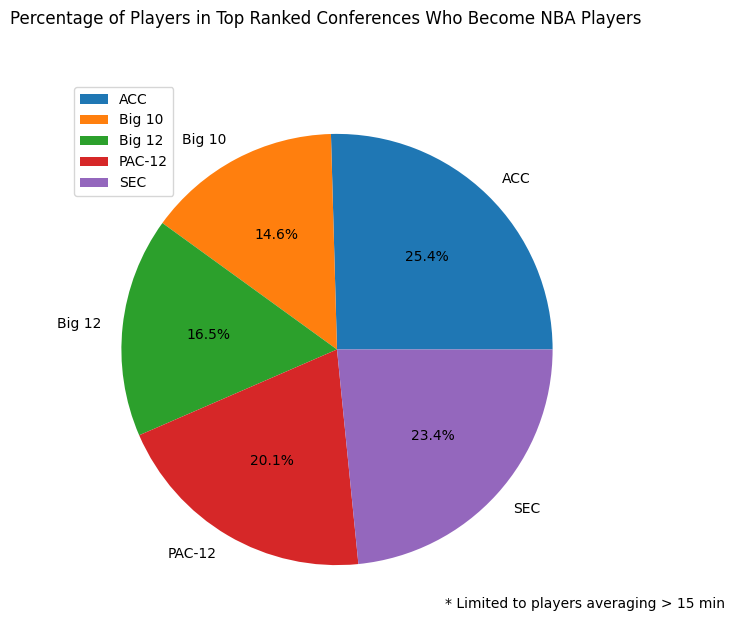

In [174]:
# plotting graph

plt.style.use('default')
palette_color = sns.color_palette('bright')
players_per_conference_df.plot.pie(y = 'in_nba', labels = players_per_conference_df['conference'], autopct = '%1.1f%%', ylabel='', figsize=(9, 7))
plt.suptitle('Percentage of Players in Top Ranked Conferences Who Become NBA Players')
plt.annotate("* Limited to players averaging > 15 min",  xytext=(.5, -1.2), xy = (0,0))

plt.savefig('Percentage of Players in Top Ranked Conferences Who Become NBA Players')
plt.show()

It looks like the PAC-12, SEC, and the ACC are the top 3 conferences in terms of players that get into the professional league. 

I spot a slight correlation with player count and players making it to the NBA. 

## Additional Questions:

• For players from the top 5 conferences, is there a correlation between PPG, APG, or RPG and the likelihood of making it to the NBA?

• Which stat (PPG, APG, or RPG) is the strongest indicator of transitioning to the NBA?

In [175]:
is_in_NBA_df = pd.concat([college_career_avg_df, is_in_NBA_df['in_nba']], axis=1)

In [176]:
is_in_NBA_df['in_nba'] = is_in_NBA_df['in_nba'].map({True: 1, False: 0})

In [177]:
is_in_NBA_df

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,fg,fga,fg%,efg%,ft,fta,ft%,conference,in_nba
0,Zion Williamson,22.60,2.10,8.90,3.50,5.40,2.10,1.80,2.40,33.00,30.00,9.00,13.20,0.68,0.71,3.90,6.20,0.64,ACC,1
1,RJ Barrett,22.60,4.30,7.60,1.60,6.00,0.90,0.40,3.20,38.00,35.30,8.40,18.50,0.45,0.51,3.90,5.90,0.66,ACC,1
2,Marvin Bagley III,21.00,1.50,11.10,4.00,7.10,0.80,0.90,2.30,33.00,33.90,8.20,13.30,0.61,0.64,4.00,6.30,0.63,ACC,1
3,Tyler Hansbrough,20.15,1.10,8.50,3.40,5.15,1.25,0.48,2.10,35.50,30.90,6.60,12.30,0.54,0.54,6.88,8.72,0.79,ACC,1
4,JJ Redick,19.88,2.20,2.72,0.48,2.22,1.10,0.10,2.12,34.75,34.05,5.90,13.70,0.43,0.55,4.75,5.22,0.92,ACC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,Darius Thompson,2.50,2.40,2.00,0.30,1.70,1.00,0.20,0.90,37.00,16.80,0.90,2.30,0.38,0.43,0.60,0.80,0.73,SEC,0
1128,Kevin Brophy,2.35,1.35,1.10,0.10,1.05,0.60,0.00,0.75,23.00,16.40,0.80,2.20,0.30,0.42,0.25,0.50,0.45,SEC,0
1163,John Florveus,2.15,0.30,2.50,1.00,1.45,0.25,0.65,0.85,30.00,15.20,0.95,2.00,0.45,0.45,0.35,0.70,0.48,SEC,0
1225,Oliver Black,1.80,0.30,2.40,0.80,1.60,0.40,0.30,0.80,31.00,15.80,0.70,1.50,0.49,0.49,0.40,0.90,0.44,SEC,0


A point-biserial correlation is a statistical measurement that determines the strength and direction of the relationship between a continuous variable and a dichotomous variable. 

In [178]:
from scipy import stats

In [179]:
is_in_NBA_df[['pts', 'ast', 'trb']].corrwith(is_in_NBA_df['in_nba'], method = stats.pointbiserialr)

,pts,ast,trb
0,4.007977e-01,1.573437e-01,3.194519e-01
1,1.095581e-145,2.363902e-22,2.622781e-90


/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/3592275565.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(is_in_NBA_df.corr(), annot = True, cmap = 'Oranges')


<Axes: >

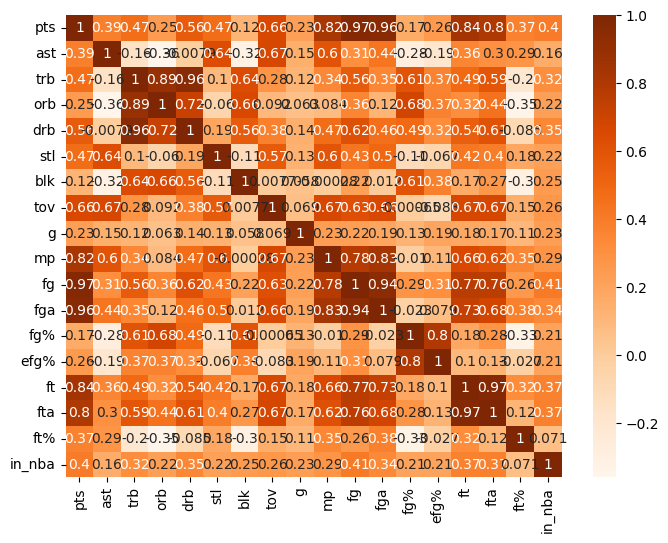

In [180]:
plt.figure(figsize= (8, 6)).set_facecolor('white')
sns.heatmap(is_in_NBA_df.corr(), annot = True, cmap = 'Oranges')

I'm mainly looking at the last column and its correlations with the three statistical categories. Looks like making it to the NBA has stronger correlations with scoring and rebounding over assists.

## Moving on to NBA data

My idea is to classify NBA players into three categories:

• little to no impact

• some impact

• high impact

Something I'll use to help me classify these players is through a composite impact score. Something similar to PER (Player Efficiency Rating) but only takes into account ppg, apg and rpg. 

### **Composite Metric Formula**

impact score = ppg + 2(apg) + rpg


### Why weigh the stats differently?
The weights  reflect the relative importance of each stat to a player’s total impact:

#### ppg:
- Scoring is the most direct measure of a player's contribution. Without points, a team can’t win.

- **Weight**: Won't have weight since it already represents direct impact.

#### apg:
- Assists create scoring opportunities. Each assist typically leads to a basket worth 2 or 3 points. 

- **Weight**: Will be weighted as 2 since it creates scoring opportunities for other players


#### rpg:
- Rebounds affect possessions:

  • **Offensive rebounds**: Lead to second-chance scoring opportunities.
  
  • **Defensive rebounds**: Prevent the opposing team from second-chance scoring opportunities.
  
- **Weight**: No weight as their contribution is less direct than assists or points.



#### **Player Example**:

- Player A: (25ppg, 5apg, 10rpg)

Impact Score = 25 + 2(5) + 10 = 45

  • Player B: (20ppg, 8apg, 8rpg)

Impact Score = 20 + 2(8) + 8 = 44


**Interpretation**: Player A’s scoring and rebounding balance narrowly edges out Player B’s playmaking focus.

In [181]:
NBA_career_avg_df

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,fg,fga,fg%,efg%,ft,fta,ft%
0,Luka Dončić,27.70,8.02,8.58,1.00,7.60,1.14,0.42,4.02,66.00,34.34,9.42,20.24,0.46,0.53,6.08,8.20,0.74
1,Kevin Durant,27.31,4.43,7.01,0.62,6.39,0.98,1.16,3.14,60.76,36.17,9.40,18.44,0.51,0.57,6.50,7.34,0.88
2,LeBron James,27.20,7.34,7.54,1.16,6.40,1.52,0.74,3.50,71.05,37.83,9.98,19.76,0.51,0.55,5.60,7.64,0.73
3,Joel Embiid,26.54,3.31,10.93,2.23,8.71,0.89,1.73,3.39,56.29,31.20,8.71,17.47,0.50,0.53,7.97,9.73,0.81
4,Kobe Bryant,26.06,5.16,5.43,1.00,4.41,1.46,0.39,3.36,66.57,37.04,9.02,20.54,0.44,0.47,6.48,7.72,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,AJ Guyton,0.00,1.00,0.00,0.00,0.00,0.50,0.00,0.50,2.00,4.50,0.00,2.00,0.00,0.00,0.00,0.00,NaN
2134,Donny Marshall,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.30,3.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,NaN
2135,Feron Hunt,0.00,0.50,0.50,0.50,0.00,0.50,0.00,0.50,2.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,NaN
2136,Trey McKinney-Jones,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,NaN,NaN,0.00,0.00,NaN


In [182]:
NBA_career_avg_df['ast']*2

0       16.04
1        8.86
2       14.68
3        6.62
4       10.32
        ...  
2133     2.00
2134     0.00
2135     1.00
2136     0.00
2137     0.60
Name: ast, Length: 2138, dtype: float64

In [183]:
NBA_career_avg_df['impact_score'] = (
    NBA_career_avg_df['pts'] 
    + NBA_career_avg_df['fg'] 
    + NBA_career_avg_df['ft'] 
    - NBA_career_avg_df['fga'] 
    - NBA_career_avg_df['fta'] 
    + NBA_career_avg_df['drb'] 
    + 0.5 * NBA_career_avg_df['orb'] 
    + NBA_career_avg_df['ast'] 
    + NBA_career_avg_df['stl'] 
    + 0.6 * NBA_career_avg_df['blk'] 
    - NBA_career_avg_df['tov']
)


In [184]:
NBA_career_avg_df.columns

Index(['player', 'pts', 'ast', 'trb', 'orb', 'drb', 'stl', 'blk', 'tov', 'g',
       'mp', 'fg', 'fga', 'fg%', 'efg%', 'ft', 'fta', 'ft%', 'impact_score'],
      dtype='object')

In [185]:
NBA_career_avg_df

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,fg,fga,fg%,efg%,ft,fta,ft%,impact_score
0,Luka Dončić,27.70,8.02,8.58,1.00,7.60,1.14,0.42,4.02,66.00,34.34,9.42,20.24,0.46,0.53,6.08,8.20,0.74,28.252
1,Kevin Durant,27.31,4.43,7.01,0.62,6.39,0.98,1.16,3.14,60.76,36.17,9.40,18.44,0.51,0.57,6.50,7.34,0.88,27.096
2,LeBron James,27.20,7.34,7.54,1.16,6.40,1.52,0.74,3.50,71.05,37.83,9.98,19.76,0.51,0.55,5.60,7.64,0.73,28.164
3,Joel Embiid,26.54,3.31,10.93,2.23,8.71,0.89,1.73,3.39,56.29,31.20,8.71,17.47,0.50,0.53,7.97,9.73,0.81,27.693
4,Kobe Bryant,26.06,5.16,5.43,1.00,4.41,1.46,0.39,3.36,66.57,37.04,9.02,20.54,0.44,0.47,6.48,7.72,0.84,21.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,AJ Guyton,0.00,1.00,0.00,0.00,0.00,0.50,0.00,0.50,2.00,4.50,0.00,2.00,0.00,0.00,0.00,0.00,NaN,-1.000
2134,Donny Marshall,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.30,3.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,NaN,-0.300
2135,Feron Hunt,0.00,0.50,0.50,0.50,0.00,0.50,0.00,0.50,2.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,NaN,-0.250
2136,Trey McKinney-Jones,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.000


In [186]:
NBA_career_avg_df_impact = NBA_career_avg_df

In [187]:
NBA_career_avg_df_impact.describe()

,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,fg,fga,fg%,efg%,ft,fta,ft%,impact_score
count,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2119.000000,2119.000000,2138.000000,2138.000000,2008.000000,2138.000000
mean,5.955407,1.335140,2.689018,0.716473,1.974813,0.485688,0.297619,0.874719,35.952633,15.594046,2.227091,5.106272,0.415106,0.459141,0.998017,1.351978,0.712356,6.179993
std,4.661069,1.368549,1.906804,0.614207,1.398859,0.344086,0.334630,0.632024,21.299725,8.339757,1.704268,3.612656,0.111864,0.117481,0.984696,1.241776,0.151826,4.780189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,2.700000,0.450000,1.350000,0.300000,1.000000,0.242500,0.090000,0.452500,15.500000,9.000000,1.000000,2.500000,0.370000,0.420000,0.400000,0.552500,0.640000,2.679250
50%,4.715000,0.900000,2.260000,0.550000,1.675000,0.430000,0.200000,0.740000,38.000000,14.500000,1.800000,4.165000,0.420000,0.480000,0.730000,1.000000,0.740000,5.090000
75%,7.810000,1.737500,3.550000,0.990000,2.600000,0.680000,0.400000,1.130000,53.397500,21.022500,2.950000,6.697500,0.470000,0.520000,1.290000,1.730000,0.800000,8.484250
max,27.700000,9.670000,12.190000,3.990000,8.710000,3.000000,2.380000,4.160000,82.000000,43.500000,9.980000,20.540000,1.000000,1.500000,7.970000,9.730000,1.000000,28.252000


Since my percentiles are based on solely raw stats, my dataset is skewing towards overrepresenting low minute players who have lower averages. 

Therefore I'll be using per 36 min statistics instead of raw career averages. The 36-minute standard is widely used in basketball analytics because it normalizes stats to reflect a player’s performance over a typical full game. NBA games are 48 minutes long, but starters usually play around 36 minutes per game, making it a practical benchmark.This ensures fair comparisons between high-minute and low-minute players by projecting their contributions over equal playing time.

This means I need to readjust impact scores as well

In [188]:
# Calculate per-36-minute stats
NBA_career_avg_df_impact['ppg_36'] = (NBA_career_avg_df_impact['pts'] / NBA_career_avg_df_impact['mp']) * 36
NBA_career_avg_df_impact['apg_36'] = (NBA_career_avg_df_impact['ast'] / NBA_career_avg_df_impact['mp']) * 36
NBA_career_avg_df_impact['rpg_36'] = (NBA_career_avg_df_impact['trb'] / NBA_career_avg_df_impact['mp']) * 36

# Drop players with zero minutes to avoid division by zero
NBA_career_avg_df_impact = NBA_career_avg_df_impact[NBA_career_avg_df_impact['mp'] > 0]

NBA_career_avg_df_impact['ppg_36'] = NBA_career_avg_df_impact['ppg_36'].round(2)
NBA_career_avg_df_impact['apg_36'] = NBA_career_avg_df_impact['apg_36'].round(2)
NBA_career_avg_df_impact['rpg_36'] = NBA_career_avg_df_impact['rpg_36'].round(2)


/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/3394350127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_career_avg_df_impact['ppg_36'] = NBA_career_avg_df_impact['ppg_36'].round(2)
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/3394350127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_career_avg_df_impact['apg_36'] = NBA_career_avg_df_impact['apg_36'].round(2)
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/3394350127.py:11: SettingWithCo

In [189]:
NBA_career_avg_df_impact = NBA_career_avg_df_impact.drop('impact_score', axis = 1)

In [190]:
NBA_career_avg_df_impact['impact_score'] = NBA_career_avg_df_impact['ppg_36'] + (1.5 * NBA_career_avg_df_impact['apg_36']) + NBA_career_avg_df_impact['rpg_36']

In [191]:
NBA_career_avg_df_impact.sort_values('impact_score', ascending=False)

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,...,fga,fg%,efg%,ft,fta,ft%,ppg_36,apg_36,rpg_36,impact_score
1775,Steven Hill,2.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.00,1.00,0.0,0.0,NaN,36.0,0.0,54.0,90.0
1793,Ahmad Caver,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.00,1.00,0.0,0.0,NaN,72.0,0.0,0.0,72.0
1861,Trevon Duval,1.7,0.7,0.3,0.0,0.3,0.0,0.0,0.0,3.0,...,1.0,0.67,0.83,0.0,0.0,NaN,30.6,12.6,5.4,54.9
1796,Donovan Williams,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,2.5,0.40,0.40,0.0,0.0,NaN,36.0,0.0,18.0,54.0
2051,Sim Bhullar,0.7,0.3,0.3,0.0,0.3,0.0,0.3,0.0,3.0,...,0.7,0.50,0.50,0.0,0.0,NaN,25.2,10.8,10.8,52.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,Ashton Hagans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2.0,...,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2096,Gani Lawal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2095,Arnoldas Kulboka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.5,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2085,Donte Grantham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.7,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.0,0.0


In [192]:
NBA_career_avg_df_impact['g'].describe()

count    2136.000000
mean       35.985360
std        21.282805
min         1.000000
25%        15.500000
50%        38.000000
75%        53.410000
max        82.000000
Name: g, dtype: float64

In [193]:
''' 
I'm segmenting players that averaged more than 15 games so that I get rid of players
that only had one off performances. 
'''
NBA_career_avg_df_impact = NBA_career_avg_df_impact[NBA_career_avg_df_impact['g'] > 15]

In [194]:
NBA_career_avg_df.describe()

,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,...,fga,fg%,efg%,ft,fta,ft%,impact_score,ppg_36,apg_36,rpg_36
count,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,...,2138.000000,2119.000000,2119.000000,2138.000000,2138.000000,2008.000000,2138.000000,2136.000000,2136.000000,2136.000000
mean,5.955407,1.335140,2.689018,0.716473,1.974813,0.485688,0.297619,0.874719,35.952633,15.594046,...,5.106272,0.415106,0.459141,0.998017,1.351978,0.712356,6.179993,12.603886,2.778544,6.280869
std,4.661069,1.368549,1.906804,0.614207,1.398859,0.344086,0.334630,0.632024,21.299725,8.339757,...,3.612656,0.111864,0.117481,0.984696,1.241776,0.151826,4.780189,4.814613,1.928699,3.247463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000
25%,2.700000,0.450000,1.350000,0.300000,1.000000,0.242500,0.090000,0.452500,15.500000,9.000000,...,2.500000,0.370000,0.420000,0.400000,0.552500,0.640000,2.679250,9.860702,1.475298,4.022624
50%,4.715000,0.900000,2.260000,0.550000,1.675000,0.430000,0.200000,0.740000,38.000000,14.500000,...,4.165000,0.420000,0.480000,0.730000,1.000000,0.740000,5.090000,12.460556,2.213127,5.711502
75%,7.810000,1.737500,3.550000,0.990000,2.600000,0.680000,0.400000,1.130000,53.397500,21.022500,...,6.697500,0.470000,0.520000,1.290000,1.730000,0.800000,8.484250,15.072638,3.809245,8.118356
max,27.700000,9.670000,12.190000,3.990000,8.710000,3.000000,2.380000,4.160000,82.000000,43.500000,...,20.540000,1.000000,1.500000,7.970000,9.730000,1.000000,28.252000,72.000000,12.600000,54.000000


<Axes: xlabel='player', ylabel='impact_score'>

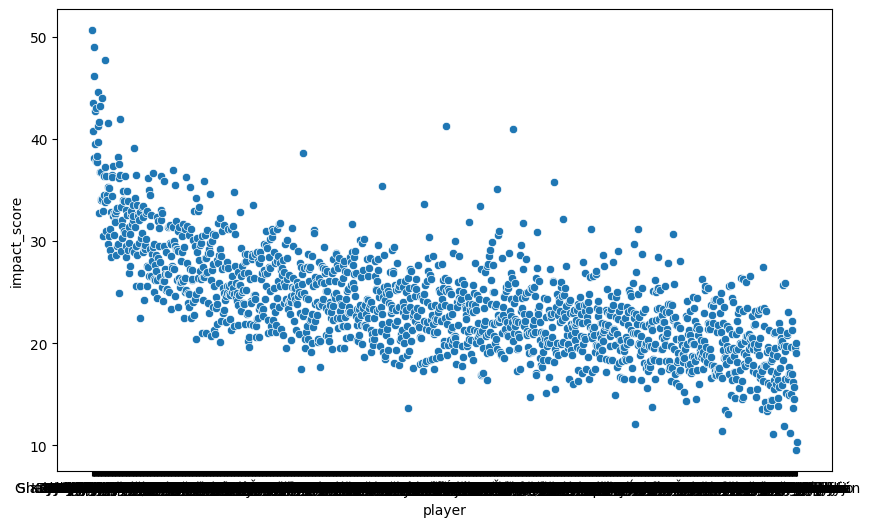

In [195]:
plt.figure(figsize=(10, 6)).set_facecolor('white')

sns.scatterplot(data = NBA_career_avg_df_impact, x = 'player', y = 'impact_score')

Now I want to find how to categorize my players. My current idea is 4 categories:

Low Impact

Medium Impact

High Impact

Elite Impact

I need to figure out exactly how to justify the cutoffs for each caliber of player. I thought that I could easily use the percentiles but after much cleaning, I can see that the majority of players have an impact score around 20-30. There are also outliers like Luka, LeBron, Kevin Durant that I shouldn't cut off. So my cutoffs need to be more nuanced.

<Axes: ylabel='impact_score'>

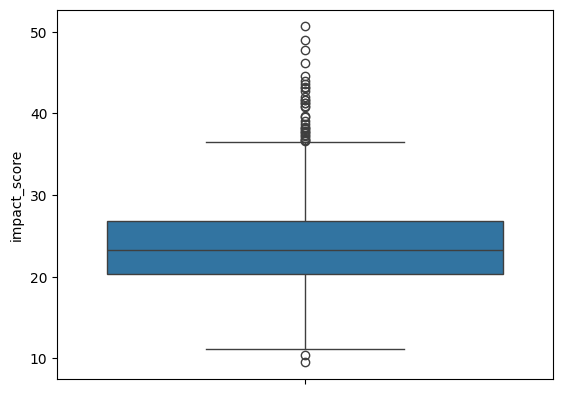

In [196]:
sns.boxplot(data = NBA_career_avg_df_impact, y = 'impact_score')

<Axes: xlabel='impact_score', ylabel='Count'>

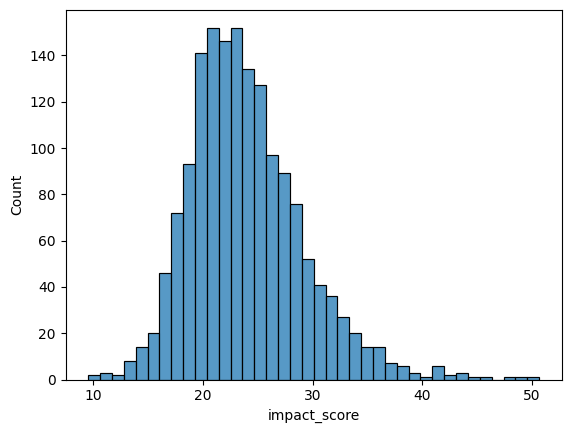

In [197]:
sns.histplot(data = NBA_career_avg_df_impact, x = 'impact_score')

In [198]:
NBA_career_avg_df_impact_cluster = NBA_career_avg_df_impact

In [199]:
'''
Let me attempt justifying each caliber through k-means clustering. I'm setting the number 
of clusters to 4, since I want 4 calibers of player. 
'''

from sklearn.cluster import KMeans

impact_scores = NBA_career_avg_df_impact_cluster[['impact_score']]

kmeans = KMeans(n_clusters = 4, random_state = 42)

NBA_career_avg_df_impact_cluster['cluster'] = kmeans.fit_predict(impact_scores)

print("Cluster Centers (Mean Impact Scores):")
print(kmeans.cluster_centers_)

Cluster Centers (Mean Impact Scores):
[[18.41035242]
 [28.3143257 ]
 [23.16801829]
 [36.1799537 ]]


/Users/siegfriedhaaan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


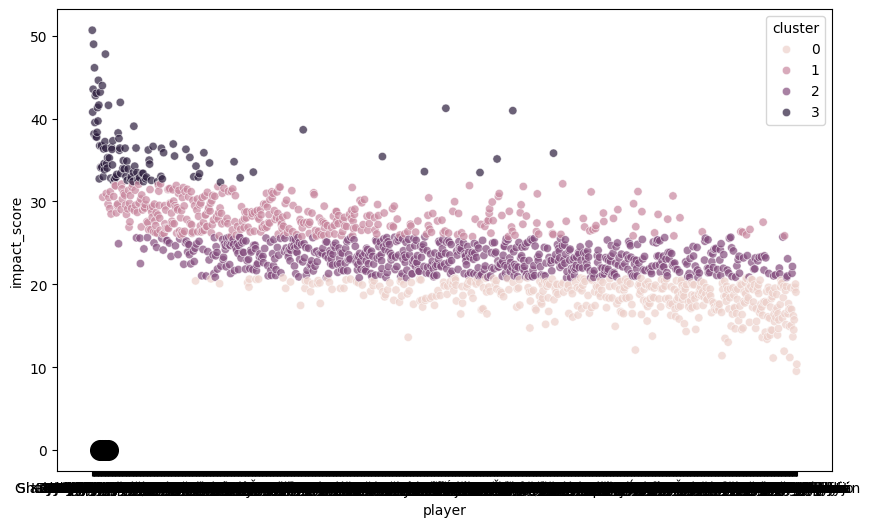

In [200]:
plt.figure(figsize = (10, 6)).set_facecolor('white')

sns.scatterplot(x = NBA_career_avg_df_impact_cluster['player'],
                y= NBA_career_avg_df_impact_cluster['impact_score'],
                hue = NBA_career_avg_df_impact_cluster['cluster'],
                alpha=0.7)

for centroid in kmeans.cluster_centers_:
    plt.scatter(centroid, 0, color = 'black', s = 200, label = 'cluster centroid')

plt.show()

In [284]:
NBA_career_avg_df_impact_cluster[NBA_career_avg_df_impact_cluster['cluster'] == 3]['player'].unique()

array(['Luka Dončić', 'Kevin Durant', 'LeBron James', 'Joel Embiid',
       'Kobe Bryant', 'Trae Young', 'Damian Lillard', 'Zion Williamson',
       'Donovan Mitchell', 'James Harden', 'Devin Booker', 'Kyrie Irving',
       'Stephen Curry', 'Anthony Davis', 'Giannis Antetokounmpo',
       'Karl-Anthony Towns', 'Allen Iverson', 'Jayson Tatum', 'Ja Morant',
       'Carmelo Anthony', 'Bradley Beal', 'Shai Gilgeous-Alexander',
       'Anthony Edwards', 'Russell Westbrook', 'Jamal Mashburn',
       'DeMar DeRozan', 'Dwyane Wade', 'Dirk Nowitzki', 'Zach LaVine',
       "De'Aaron Fox", 'Nikola Jokić', 'Kristaps Porziņģis',
       'Michael Jordan', 'Paolo Banchero', 'Brandon Ingram',
       'Paul George', 'LaMelo Ball', 'Kawhi Leonard', 'Chris Bosh',
       'CJ McCollum', 'Ray Allen', "D'Angelo Russell", 'Cade Cunningham',
       'Yao Ming', 'John Wall', 'Jaylen Brown', 'Darius Garland',
       'Jimmy Butler', 'Paul Pierce', 'LaMarcus Aldridge', 'Kemba Walker',
       'Chris Paul', 'Nikola Vuč

In [202]:
NBA_career_avg_df_impact['impact_score_raw'] = (
    NBA_career_avg_df['pts'] 
    + NBA_career_avg_df['fg'] 
    + NBA_career_avg_df['ft'] 
    - NBA_career_avg_df['fga'] 
    - NBA_career_avg_df['fta'] 
    + NBA_career_avg_df['drb'] 
    + 0.5 * NBA_career_avg_df['orb'] 
    + NBA_career_avg_df['ast'] 
    + NBA_career_avg_df['stl'] 
    + 0.6 * NBA_career_avg_df['blk'] 
    - NBA_career_avg_df['tov']
)

In [203]:
NBA_career_avg_df_impact_cluster_raw = NBA_career_avg_df_impact

In [204]:
NBA_career_avg_df_impact_cluster_raw['g'].describe()

count    1611.000000
mean       45.276840
std        15.590039
min        15.200000
25%        33.225000
50%        46.090000
75%        57.500000
max        82.000000
Name: g, dtype: float64

In [205]:
'''
Let me attempt justifying each caliber through k-means clustering. I'm setting the number 
of clusters to 4, since I want 4 calibers of player. 
'''

from sklearn.cluster import KMeans

impact_scores_raw = NBA_career_avg_df_impact_cluster_raw[['impact_score_raw']]

kmeans_raw = KMeans(n_clusters = 4, random_state = 42)

NBA_career_avg_df_impact_cluster_raw['cluster'] = kmeans_raw.fit_predict(impact_scores_raw)

print("Cluster Centers (RAW Mean Impact Scores):") 
print(kmeans_raw.cluster_centers_)

Cluster Centers (RAW Mean Impact Scores):
[[ 3.44734467]
 [12.4340669 ]
 [ 7.36094655]
 [19.47734   ]]


/Users/siegfriedhaaan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


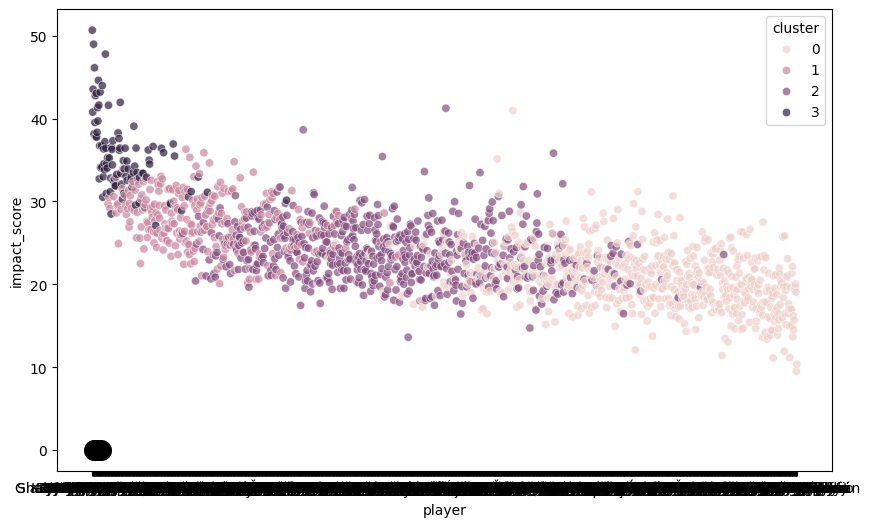

In [206]:
plt.figure(figsize = (10, 6)).set_facecolor('white')

sns.scatterplot(x = NBA_career_avg_df_impact_cluster_raw['player'],
                y= NBA_career_avg_df_impact_cluster_raw['impact_score'],
                hue = NBA_career_avg_df_impact_cluster_raw['cluster'],
                alpha=0.7)

for centroid in kmeans_raw.cluster_centers_:
    plt.scatter(centroid, 0, color = 'black', s = 200, label = 'cluster centroid')

plt.show()

In [285]:
NBA_career_avg_df_impact_cluster_raw[NBA_career_avg_df_impact_cluster_raw['cluster'] == 3]['player'].unique()

array(['Luka Dončić', 'Kevin Durant', 'LeBron James', 'Joel Embiid',
       'Kobe Bryant', 'Trae Young', 'Damian Lillard', 'Zion Williamson',
       'Donovan Mitchell', 'James Harden', 'Devin Booker', 'Kyrie Irving',
       'Stephen Curry', 'Anthony Davis', 'Giannis Antetokounmpo',
       'Karl-Anthony Towns', 'Allen Iverson', 'Jayson Tatum', 'Ja Morant',
       'Carmelo Anthony', 'Bradley Beal', 'Shai Gilgeous-Alexander',
       'Anthony Edwards', 'Russell Westbrook', 'Jamal Mashburn',
       'DeMar DeRozan', 'Dwyane Wade', 'Dirk Nowitzki', 'Zach LaVine',
       "De'Aaron Fox", 'Nikola Jokić', 'Kristaps Porziņģis',
       'Michael Jordan', 'Paolo Banchero', 'Brandon Ingram',
       'Paul George', 'LaMelo Ball', 'Kawhi Leonard', 'Chris Bosh',
       'CJ McCollum', 'Ray Allen', "D'Angelo Russell", 'Cade Cunningham',
       'Yao Ming', 'John Wall', 'Jaylen Brown', 'Darius Garland',
       'Jimmy Butler', 'Paul Pierce', 'LaMarcus Aldridge', 'Kemba Walker',
       'Chris Paul', 'Nikola Vuč

<Axes: xlabel='impact_score', ylabel='Count'>

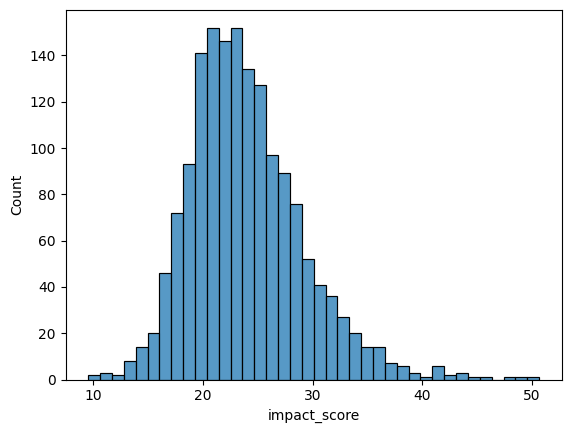

In [207]:
sns.histplot(data = NBA_career_avg_df_impact_cluster_raw, x = 'impact_score')

In [208]:
NBA_career_avg_df_impact_cluster_raw[NBA_career_avg_df_impact_cluster_raw['cluster'] == 3]

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,...,efg%,ft,fta,ft%,ppg_36,apg_36,rpg_36,impact_score,cluster,impact_score_raw
0,Luka Dončić,27.70,8.02,8.58,1.00,7.60,1.14,0.42,4.02,66.00,...,0.53,6.08,8.20,0.74,29.04,8.41,8.99,50.645,3,28.252
1,Kevin Durant,27.31,4.43,7.01,0.62,6.39,0.98,1.16,3.14,60.76,...,0.57,6.50,7.34,0.88,27.18,4.41,6.98,40.775,3,27.096
2,LeBron James,27.20,7.34,7.54,1.16,6.40,1.52,0.74,3.50,71.05,...,0.55,5.60,7.64,0.73,25.88,6.98,7.18,43.530,3,28.164
3,Joel Embiid,26.54,3.31,10.93,2.23,8.71,0.89,1.73,3.39,56.29,...,0.53,7.97,9.73,0.81,30.62,3.82,12.61,48.960,3,27.693
4,Kobe Bryant,26.06,5.16,5.43,1.00,4.41,1.46,0.39,3.36,66.57,...,0.47,6.48,7.72,0.84,25.33,5.02,5.28,38.140,3,21.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Jarrett Allen,12.22,1.51,9.29,2.95,6.34,0.59,1.36,1.44,59.00,...,0.64,2.74,3.89,0.71,15.70,1.94,11.94,30.550,3,17.651
228,Rudy Gobert,12.16,1.27,11.36,3.21,8.12,0.68,2.08,1.64,68.10,...,0.63,3.16,4.97,0.62,14.91,1.56,13.93,31.180,3,19.223
244,Clint Capela,11.67,0.91,10.22,3.39,6.84,0.64,1.43,1.06,59.56,...,0.61,1.43,2.81,0.50,16.53,1.29,14.48,32.945,3,17.123
265,Jason Kidd,11.25,8.37,6.33,1.03,5.28,1.81,0.32,2.62,69.08,...,0.48,1.77,2.19,0.81,11.61,8.64,6.53,31.100,3,18.367


In [209]:
NBA_career_avg_df_impact_cluster_raw[NBA_career_avg_df_impact_cluster_raw['cluster'] == 3]['player'].unique()

array(['Luka Dončić', 'Kevin Durant', 'LeBron James', 'Joel Embiid',
       'Kobe Bryant', 'Trae Young', 'Damian Lillard', 'Zion Williamson',
       'Donovan Mitchell', 'James Harden', 'Devin Booker', 'Kyrie Irving',
       'Stephen Curry', 'Anthony Davis', 'Giannis Antetokounmpo',
       'Karl-Anthony Towns', 'Allen Iverson', 'Jayson Tatum', 'Ja Morant',
       'Carmelo Anthony', 'Bradley Beal', 'Shai Gilgeous-Alexander',
       'Anthony Edwards', 'Russell Westbrook', 'Jamal Mashburn',
       'DeMar DeRozan', 'Dwyane Wade', 'Dirk Nowitzki', 'Zach LaVine',
       "De'Aaron Fox", 'Nikola Jokić', 'Kristaps Porziņģis',
       'Michael Jordan', 'Paolo Banchero', 'Brandon Ingram',
       'Paul George', 'LaMelo Ball', 'Kawhi Leonard', 'Chris Bosh',
       'CJ McCollum', 'Ray Allen', "D'Angelo Russell", 'Cade Cunningham',
       'Yao Ming', 'John Wall', 'Jaylen Brown', 'Darius Garland',
       'Jimmy Butler', 'Paul Pierce', 'LaMarcus Aldridge', 'Kemba Walker',
       'Chris Paul', 'Nikola Vuč

In [210]:
NBA_career_avg_df_impact_cluster_raw


[NBA_career_avg_df_impact_cluster_raw['player'] == 'Sam Cassell']

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2037    False
 2045    False
 2055    False
 2063    False
 2077    False
 Name: player, Length: 1611, dtype: bool]

So it looks like no matter what I do, k means will classify players that I don't want classified as elite into the elite tier. This makes sense since K-Means prioritizes variance minimization, not basketball context. So I'm going to pivot and use percentiles as my classifiers since percentiles create clear thresholds (e.g., Top 10% as elite) that better reflect basketball hierarchies, robust against skewed distributions or outliers, and it's probably easier to understand instead of k means techniques. 

In [211]:
NBA_career_avg_df_percentile_cluster = NBA_career_avg_df

In [212]:
NBA_career_avg_df_percentile_cluster['g'].describe()

count    2138.000000
mean       35.952633
std        21.299725
min         1.000000
25%        15.500000
50%        38.000000
75%        53.397500
max        82.000000
Name: g, dtype: float64

In [213]:
NBA_career_avg_df_percentile_cluster = NBA_career_avg_df_percentile_cluster[NBA_career_avg_df_percentile_cluster['g'] > 20]

In [214]:
NBA_career_avg_df_percentile_cluster['impact_score'].describe()

count    1500.000000
mean        7.779815
std         4.662590
min         0.350000
25%         4.383750
50%         6.661000
75%        10.040500
max        28.252000
Name: impact_score, dtype: float64

<Axes: xlabel='impact_score', ylabel='Count'>

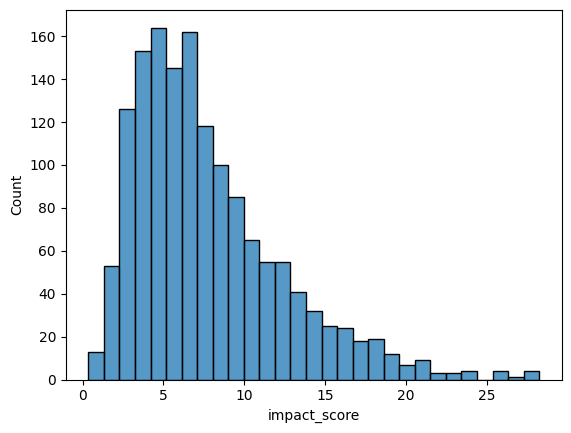

In [215]:
sns.histplot(data = NBA_career_avg_df_percentile_cluster, x = 'impact_score')

In [216]:
NBA_career_avg_df_percentile_cluster[NBA_career_avg_df_percentile_cluster['impact_score'] > NBA_career_avg_df_percentile_cluster['impact_score'].quantile(.9)]['player'].unique()

array(['Luka Dončić', 'Kevin Durant', 'LeBron James', 'Joel Embiid',
       'Kobe Bryant', 'Trae Young', 'Damian Lillard', 'Zion Williamson',
       'Donovan Mitchell', 'James Harden', 'Devin Booker', 'Kyrie Irving',
       'Stephen Curry', 'Anthony Davis', 'Giannis Antetokounmpo',
       'Karl-Anthony Towns', 'Allen Iverson', 'Jayson Tatum', 'Ja Morant',
       'Carmelo Anthony', 'Bradley Beal', 'Shai Gilgeous-Alexander',
       'Anthony Edwards', 'Russell Westbrook', 'Jamal Mashburn',
       'DeMar DeRozan', 'Dwyane Wade', 'Dirk Nowitzki', 'Zach LaVine',
       "De'Aaron Fox", 'Nikola Jokić', 'Kristaps Porziņģis',
       'Michael Jordan', 'Paolo Banchero', 'Brandon Ingram',
       'Paul George', 'Klay Thompson', 'LaMelo Ball', 'Jalen Green',
       'Kawhi Leonard', 'Andrew Wiggins', 'Chris Bosh', 'CJ McCollum',
       'Ray Allen', "D'Angelo Russell", 'Cade Cunningham', 'Yao Ming',
       'John Wall', 'Jaylen Brown', 'Darius Garland', 'Jimmy Butler',
       'Paul Pierce', 'LaMarcus Al

elite = top 5%

high = 

In [217]:
NBA_career_avg_df_percentile_cluster[NBA_career_avg_df_percentile_cluster['player'] == 'LeBron James']

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,...,fga,fg%,efg%,ft,fta,ft%,impact_score,ppg_36,apg_36,rpg_36
2,LeBron James,27.2,7.34,7.54,1.16,6.4,1.52,0.74,3.5,71.05,...,19.76,0.51,0.55,5.6,7.64,0.73,28.164,25.884219,6.984933,7.175258


In [218]:
NBA_career_avg_df_percentile_cluster[NBA_career_avg_df_percentile_cluster['impact_score'] < NBA_career_avg_df_percentile_cluster['impact_score'].quantile(.7)]

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,...,fga,fg%,efg%,ft,fta,ft%,impact_score,ppg_36,apg_36,rpg_36
267,Jordan Crawford,11.22,3.02,2.35,0.52,1.82,0.63,0.09,1.75,39.50,...,10.25,0.41,0.47,1.62,1.94,0.83,8.904,17.904255,4.819149,3.750000
269,Nick Young,11.21,0.92,1.90,0.37,1.54,0.54,0.21,1.00,55.86,...,9.59,0.41,0.49,1.86,2.23,0.84,7.491,17.754509,1.457105,3.009239
286,Juan Carlos Navarro,10.90,2.20,2.60,0.40,2.10,0.60,0.00,1.60,82.00,...,9.30,0.40,0.50,1.50,1.80,0.85,8.600,15.209302,3.069767,3.627907
294,Marcus Thornton,10.83,1.34,2.70,0.76,1.94,0.83,0.13,0.98,46.06,...,9.58,0.41,0.48,1.46,1.79,0.82,8.498,18.016636,2.229205,4.491682
303,Terrence Ross,10.69,1.37,2.79,0.33,2.45,0.83,0.32,0.95,58.27,...,9.37,0.42,0.51,1.07,1.27,0.82,9.107,15.817509,2.027127,4.128237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,Devin Green,0.90,0.30,0.90,0.40,0.50,0.10,0.00,0.20,27.00,...,1.00,0.21,0.21,0.50,0.80,0.62,0.700,6.480000,2.160000,6.480000
2035,Leandro Bolmaro,0.90,0.55,0.85,0.40,0.50,0.20,0.05,0.45,24.50,...,1.45,0.23,0.26,0.15,0.20,0.85,0.780,5.491525,3.355932,5.186441
2036,Sasha Kaun,0.90,0.10,1.00,0.50,0.60,0.20,0.20,0.30,25.00,...,0.70,0.53,0.53,0.20,0.40,0.46,1.370,8.526316,0.947368,9.473684
2055,Erik Daniels,0.60,0.20,0.90,0.30,0.50,0.10,0.00,0.30,21.00,...,0.90,0.33,0.36,0.00,0.00,NaN,0.650,6.352941,2.117647,9.529412


I'm thinking a feature that could be introduced to the product would be an archetype comparison. When there's an output of 4 years worth of stats, we could take the 4th year and find the 3 players closest to that line of production. Then we take those 3 players and say "the prospect you have entered will have a similar impact as these 3 players: ... on year 4". Very reminiscent of the feature on NBA 2k for when right you finish your 'myplayer', there's a comparison with the player you created and 3 players the game deems similar

## Prediction

This is where I will start selecting input and target variables. I'll consolidate everybody's first four seasons in the NBA into one row of data and use it as the target variable, while my input features will be the college data. 

I'll be using ***random forest regressor*** to model the relationships between features and will be using ***multi output regressor*** to enable it to handle multiple targets simultaneously. 

In [219]:
first_four_seasons_df = pd.read_csv('first_four_seasons.csv', index_col= 0).reset_index(drop = True)

In [220]:
first_four_seasons_df

,player,age,team,pos,pts,ast,trb,orb,drb,stl,...,g,mp,fg,fga,fg%,efg%,ft,fta,ft%,year
0,A.J. Green,23.0,MIL,SG,4.4,0.6,1.3,0.2,1.1,0.2,...,35.0,9.9,1.5,3.6,0.424,0.600,0.1,0.1,1.000,2023
1,A.J. Guyton,24.0,GSW,PG,0.0,1.0,0.0,0.0,0.0,0.5,...,2.0,4.5,0.0,2.0,0.000,0.000,0.0,0.0,NaN,2003
2,A.J. Hammons,24.0,DAL,C,2.2,0.2,1.6,0.4,1.3,0.0,...,22.0,7.4,0.8,1.9,0.405,0.464,0.4,0.9,0.450,2017
3,A.J. Lawson,22.0,2TM,SG,3.7,0.1,1.4,0.4,1.0,0.1,...,15.0,7.2,1.5,2.9,0.500,0.614,0.1,0.5,0.250,2023
4,A.J. Lawson,22.0,MIN,SG,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,1.0,1.0,1.000,1.000,0.0,0.0,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,Žarko Čabarkapa,23.0,GSW,PF,6.2,0.7,2.7,0.9,1.8,0.3,...,37.0,12.5,2.2,4.6,0.482,0.521,1.4,1.7,0.813,2005
6466,Željko Rebrača,30.0,DET,C,6.6,0.3,3.1,0.9,2.2,0.2,...,30.0,16.3,2.7,4.8,0.552,0.552,1.3,1.6,0.792,2003
6467,Željko Rebrača,31.0,2TM,C,3.8,0.3,2.4,1.0,1.5,0.2,...,24.0,11.4,1.4,3.2,0.442,0.442,1.0,1.3,0.767,2004
6468,Željko Rebrača,31.0,DET,C,3.1,0.2,2.3,0.9,1.4,0.2,...,21.0,10.6,1.0,2.6,0.407,0.407,1.0,1.3,0.786,2004


In [221]:
NBA_first_four_df = first_four_seasons_df.groupby('player').agg({
    'pts': 'mean',
    'ast': 'mean', 
    'trb': 'mean',
    'drb': 'mean', 
    'orb': 'mean',
    'stl': 'mean', 
    'blk': 'mean', 
    'tov': 'mean',
    'g': 'mean', 
    'mp': 'mean', 
    'fg': 'mean',
    'fga': 'mean', 
    'ft': 'mean', 
    'fta': 'mean',
}).reset_index().round(2)

In [222]:
NBA_first_four_df

,player,pts,ast,trb,drb,orb,stl,blk,tov,g,mp,fg,fga,ft,fta
0,A.J. Green,4.40,0.60,1.30,1.10,0.20,0.20,0.00,0.30,35.00,9.90,1.50,3.60,0.10,0.10
1,A.J. Guyton,0.00,1.00,0.00,0.00,0.00,0.50,0.00,0.50,2.00,4.50,0.00,2.00,0.00,0.00
2,A.J. Hammons,2.20,0.20,1.60,1.30,0.40,0.00,0.60,0.50,22.00,7.40,0.80,1.90,0.40,0.90
3,A.J. Lawson,3.20,0.07,1.27,1.00,0.27,0.07,0.00,0.13,10.00,5.60,1.33,2.33,0.07,0.37
4,A.J. Price,6.35,2.42,1.60,1.30,0.30,0.57,0.05,1.00,51.75,16.65,2.25,5.98,0.92,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,Óscar Torres,3.10,0.20,0.70,0.50,0.20,0.20,0.10,0.50,17.00,6.40,0.90,2.10,0.80,1.20
2134,Ömer Aşık,5.45,0.57,7.15,4.98,2.20,0.40,0.90,1.27,69.50,19.25,2.08,3.90,1.30,2.40
2135,Šarūnas Jasikevičius,6.28,2.75,1.30,1.08,0.25,0.45,0.02,1.42,50.25,16.50,2.05,5.18,1.40,1.55
2136,Žarko Čabarkapa,4.82,0.52,2.08,1.32,0.75,0.20,0.12,0.68,32.25,9.93,1.85,3.82,0.92,1.18


In [223]:
NBA_first_four_df['impact_score'] = (
    NBA_first_four_df['pts'] 
    + NBA_first_four_df['fg'] 
    + NBA_first_four_df['ft'] 
    + NBA_first_four_df['drb'] 
    + (0.5 * NBA_first_four_df['orb'])
    + NBA_first_four_df['ast'] 
    + NBA_first_four_df['stl'] 
    + (0.5 * NBA_first_four_df['blk'])
    - NBA_first_four_df['tov']
    - NBA_first_four_df['fga'] 
    - NBA_first_four_df['fta']
)

In [224]:
NBA_first_four_df = NBA_first_four_df[NBA_first_four_df['g'] > 20]

In [225]:
'''
Let me attempt justifying each caliber through k-means clustering. I'm setting the number 
of clusters to 4, since I want 4 calibers of player. 
'''

from sklearn.cluster import KMeans

impact_scores = NBA_first_four_df[['impact_score']]

kmeans = KMeans(n_clusters = 4, random_state = 42)

NBA_first_four_df['cluster'] = kmeans.fit_predict(impact_scores)

print("Cluster Centers (RAW Mean Impact Scores):") 
print(kmeans_raw.cluster_centers_)

Cluster Centers (RAW Mean Impact Scores):
[[ 3.44734467]
 [12.4340669 ]
 [ 7.36094655]
 [19.47734   ]]


/Users/siegfriedhaaan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/1239848705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_first_four_df['cluster'] = kmeans.fit_predict(impact_scores)


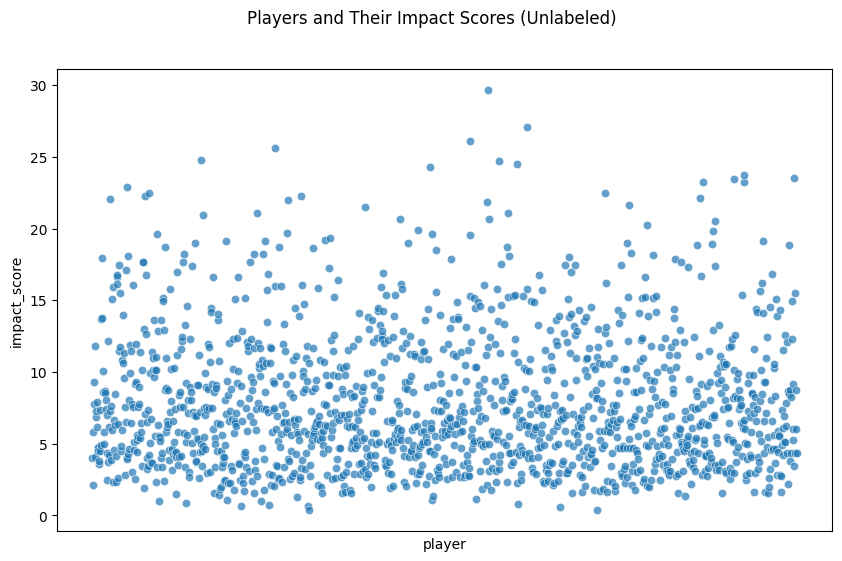

In [226]:
plt.figure(figsize=(10, 6)).set_facecolor('white')
sns.scatterplot(x=NBA_first_four_df['player'],
                y=NBA_first_four_df['impact_score'],
                alpha=0.7)


plt.xticks([])
plt.suptitle('Players and Their Impact Scores (Unlabeled)')
plt.savefig('Players and Their Impact Scores (Unlabeled)')
plt.show()


/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/3232977683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_first_four_df['cluster_label'] = NBA_first_four_df['cluster'].map(cluster_labels)


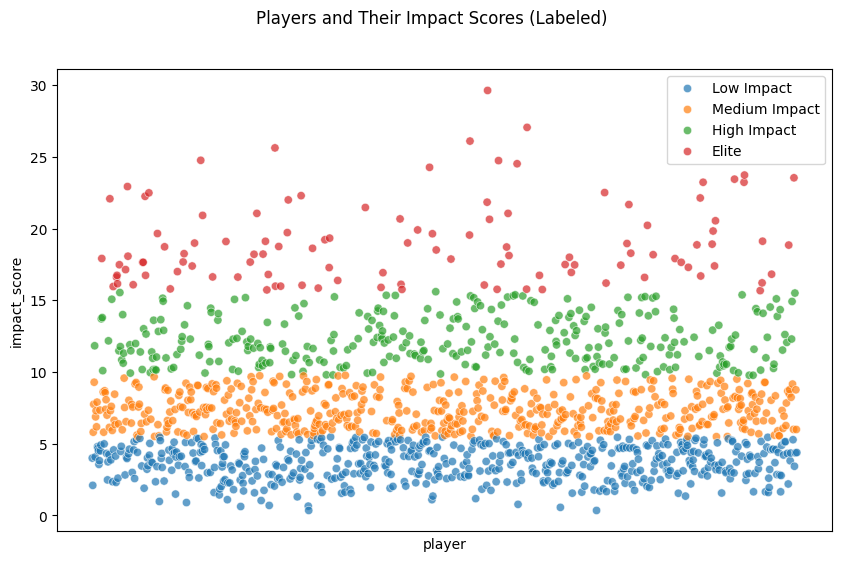

In [227]:
# Define the cluster labels
cluster_labels = {0: 'High Impact', 1: 'Low Impact', 2: 'Elite', 3: 'Medium Impact'}

# Map the cluster values to the labels
NBA_first_four_df['cluster_label'] = NBA_first_four_df['cluster'].map(cluster_labels)

# Create the scatter plot
plt.figure(figsize=(10, 6)).set_facecolor('white')
sns.scatterplot(x=NBA_first_four_df['player'],
                y=NBA_first_four_df['impact_score'],
                hue=NBA_first_four_df['cluster_label'],
                alpha=0.7)

plt.suptitle('Players and Their Impact Scores (Labeled)')
plt.legend()
plt.xticks([])  # Remove x-tick labels
plt.savefig('Players and Their Impact Scores (Labeled)')
plt.show()


In [260]:
NBA_first_four_df[NBA_first_four_df['cluster'] == 2]['player'].unique()

array(['Al Horford', 'Allen Iverson', "Amar'e Stoudemire",
       'Andre Drummond', 'Andre Iguodala', 'Andre Miller',
       'Andrei Kirilenko', 'Antawn Jamison', 'Anthony Davis',
       'Anthony Edwards', 'Antoine Walker', 'Bam Adebayo', 'Baron Davis',
       'Ben Simmons', 'Ben Wallace', 'Blake Griffin', 'Brad Miller',
       'Brandon Roy', 'Brook Lopez', 'Cade Cunningham', 'Carlos Boozer',
       'Carmelo Anthony', 'Chauncey Billups', 'Chris Bosh', 'Chris Paul',
       'Chris Webber', 'Corey Maggette', 'Damian Lillard',
       'Darius Garland', "De'Aaron Fox", 'DeMarcus Cousins',
       'Deandre Ayton', 'Deron Williams', 'Derrick Rose', 'Desmond Bane',
       'Devin Booker', 'Dirk Nowitzki', 'Domantas Sabonis',
       'Donovan Mitchell', 'Donyell Marshall', 'Dwight Howard',
       'Dwyane Wade', 'Elton Brand', 'Emeka Okafor', 'Evan Mobley',
       'Franz Wagner', 'Gary Payton', 'Giannis Antetokounmpo',
       'Gilbert Arenas', 'Greg Monroe', 'Ja Morant', 'Jalen Williams',
       'Ja

In [229]:
# elite
NBA_first_four_df[NBA_first_four_df['cluster'] == 0]['impact_score'].max()

15.600000000000001

In [230]:
# high impact
NBA_first_four_df[NBA_first_four_df['cluster'] == 0]['impact_score'].min(), NBA_first_four_df[NBA_first_four_df['cluster'] == 0]['impact_score'].max()

(9.774999999999997, 15.600000000000001)

In [231]:
# medium impact
NBA_first_four_df[NBA_first_four_df['cluster'] == 3]['impact_score'].min(), NBA_first_four_df[NBA_first_four_df['cluster'] == 3]['impact_score'].max()

(5.485000000000002, 9.77)

In [232]:
# low impact
NBA_first_four_df[NBA_first_four_df['cluster'] == 1]['impact_score'].max()

5.475

In [233]:
college_career_avg_df

,player,pts,ast,trb,orb,drb,stl,blk,tov,g,mp,fg,fga,fg%,efg%,ft,fta,ft%,conference
0,Zion Williamson,22.60,2.10,8.90,3.50,5.40,2.10,1.80,2.40,33.00,30.00,9.00,13.20,0.68,0.71,3.90,6.20,0.64,ACC
1,RJ Barrett,22.60,4.30,7.60,1.60,6.00,0.90,0.40,3.20,38.00,35.30,8.40,18.50,0.45,0.51,3.90,5.90,0.66,ACC
2,Marvin Bagley III,21.00,1.50,11.10,4.00,7.10,0.80,0.90,2.30,33.00,33.90,8.20,13.30,0.61,0.64,4.00,6.30,0.63,ACC
3,Tyler Hansbrough,20.15,1.10,8.50,3.40,5.15,1.25,0.48,2.10,35.50,30.90,6.60,12.30,0.54,0.54,6.88,8.72,0.79,ACC
4,JJ Redick,19.88,2.20,2.72,0.48,2.22,1.10,0.10,2.12,34.75,34.05,5.90,13.70,0.43,0.55,4.75,5.22,0.92,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,Darius Thompson,2.50,2.40,2.00,0.30,1.70,1.00,0.20,0.90,37.00,16.80,0.90,2.30,0.38,0.43,0.60,0.80,0.73,SEC
1128,Kevin Brophy,2.35,1.35,1.10,0.10,1.05,0.60,0.00,0.75,23.00,16.40,0.80,2.20,0.30,0.42,0.25,0.50,0.45,SEC
1163,John Florveus,2.15,0.30,2.50,1.00,1.45,0.25,0.65,0.85,30.00,15.20,0.95,2.00,0.45,0.45,0.35,0.70,0.48,SEC
1225,Oliver Black,1.80,0.30,2.40,0.80,1.60,0.40,0.30,0.80,31.00,15.80,0.70,1.50,0.49,0.49,0.40,0.90,0.44,SEC


In [234]:
"""
I can see that the way people who have a first name that contain mere initials are spelled differently between datasets. RJ Barrett and JJ Redick on the NBA dataset are R.J. Barett and J.J. Redick on the college dataset. 
I'm going to try and account for every possibility of that happening and standardize their names. 

First I'll strip the whitespace out of all player names

Then I'm replacing all instances of a period with a blank
"""
NBA_first_four_df['player'] = NBA_first_four_df['player'].str.strip()
NBA_first_four_df['player'] = NBA_first_four_df['player'].str.strip()
NBA_first_four_df['player'] = NBA_first_four_df['player'].str.replace('.', '')
NBA_first_four_df['player'] = NBA_first_four_df['player'].str.replace('.', '')

/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/339716385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_first_four_df['player'] = NBA_first_four_df['player'].str.strip()
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/339716385.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_first_four_df['player'] = NBA_first_four_df['player'].str.strip()
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_1233/339716385.py:11: FutureWarning: The default value of re

In [235]:
college_career_avg_df['impact_score'] = (
    college_career_avg_df['pts'] 
    + college_career_avg_df['fg'] 
    + college_career_avg_df['ft'] 
    + college_career_avg_df['drb'] 
    + (0.5 * college_career_avg_df['orb'])
    + college_career_avg_df['ast'] 
    + college_career_avg_df['stl'] 
    + (0.5 * college_career_avg_df['blk'])
    - college_career_avg_df['tov']
    - college_career_avg_df['fga'] 
    - college_career_avg_df['fta'] 
)

In [236]:
merged_df = pd.merge(NBA_first_four_df, college_career_avg_df, on = 'player', suffixes=('_college', '_nba'))

In [237]:
merged_df = merged_df.drop(columns = ['fg%', 'efg%', 'ft%'])

In [238]:
merged_df.columns

Index(['player', 'pts_college', 'ast_college', 'trb_college', 'drb_college',
       'orb_college', 'stl_college', 'blk_college', 'tov_college', 'g_college',
       'mp_college', 'fg_college', 'fga_college', 'ft_college', 'fta_college',
       'impact_score_college', 'cluster', 'cluster_label', 'pts_nba',
       'ast_nba', 'trb_nba', 'orb_nba', 'drb_nba', 'stl_nba', 'blk_nba',
       'tov_nba', 'g_nba', 'mp_nba', 'fg_nba', 'fga_nba', 'ft_nba', 'fta_nba',
       'conference', 'impact_score_nba'],
      dtype='object')

In [239]:
features = merged_df[['pts_college', 'ast_college', 'trb_college', 'drb_college',
       'orb_college', 'stl_college', 'blk_college', 'tov_college',
       'mp_college', 'fg_college', 'fga_college', 'ft_college', 'fta_college'
       ]]

targets = merged_df[['pts_nba', 'ast_nba', 'trb_nba', 'orb_nba',
       'drb_nba', 'stl_nba', 'blk_nba', 'tov_nba', 'mp_nba', 'fg_nba',
       'fga_nba', 'ft_nba', 'fta_nba']]

In [240]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Split  dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Why these parameters:
# - test_size=0.2: Reserves 20% of the data for testing, a common split for balanced datasets.
# - random_state=42: Ensures consistent results when re-running the code.

In [241]:
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('nba_predictor_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [242]:
# Predict NBA stats and impact score for the test set
predictions = model.predict(X_test)


# Why predictions might vary:
# - MultiOutputRegressor creates independent models for each target variable, so it doesn't assume relationships between them.

In [243]:
predictions_df = pd.DataFrame(predictions, columns = y_test.columns)
actuals_df = pd.DataFrame(y_test.values, columns=y_test.columns)


In [244]:
residuals_df = actuals_df - predictions_df

In [245]:
actuals_df = actuals_df.add_suffix('_actual')
predictions_df = predictions_df.add_suffix('_predicted')
residuals_df = residuals_df.add_suffix('_residual')

In [246]:
merged_df = pd.concat([actuals_df, predictions_df], axis = 1)

In [247]:
comparison_df = pd.concat([merged_df, residuals_df], axis = 1)

In [248]:
comparison_df

,pts_nba_actual,ast_nba_actual,trb_nba_actual,orb_nba_actual,drb_nba_actual,stl_nba_actual,blk_nba_actual,tov_nba_actual,mp_nba_actual,fg_nba_actual,...,orb_nba_residual,drb_nba_residual,stl_nba_residual,blk_nba_residual,tov_nba_residual,mp_nba_residual,fg_nba_residual,fga_nba_residual,ft_nba_residual,fta_nba_residual
0,14.85,2.75,5.60,1.25,4.35,1.30,0.65,2.10,29.45,5.30,...,-0.569742,0.525167,0.446933,-0.175000,0.174450,2.823550,0.955058,1.767725,0.541150,0.348600
1,15.70,3.07,3.27,0.73,2.53,2.00,0.20,2.17,34.13,5.47,...,0.142700,0.180450,0.614158,0.016667,-0.095400,3.140900,1.160500,2.328200,0.280850,0.732667
2,15.90,2.33,2.20,0.40,1.90,0.73,0.10,2.20,29.70,5.07,...,-0.470783,-0.671167,-0.092350,-0.066300,0.205000,0.932700,0.635300,0.027700,-0.119300,-0.548467
3,9.75,1.50,6.30,2.40,3.95,1.25,0.95,1.25,25.35,3.55,...,0.876800,-0.191100,-0.310100,-0.221133,-0.433283,-3.013700,-0.473137,-1.447000,-0.682987,-0.952850
4,14.70,2.27,4.10,1.10,2.97,0.93,0.13,1.50,28.47,5.37,...,-0.034500,-0.180600,0.028500,-0.095367,-0.295300,-1.602615,0.720392,2.082000,-0.217753,-0.359783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,9.50,1.40,4.00,1.00,3.00,0.80,0.50,1.90,22.10,3.50,...,-0.002200,-0.726600,-0.321000,0.121600,-0.404800,-10.233500,-1.734500,-4.125900,-2.024900,-2.104700
112,5.50,0.85,4.50,1.95,2.55,0.75,2.40,0.95,23.15,2.30,...,-1.278400,-3.175600,-0.013000,-0.997700,-1.180000,-8.910800,-2.496770,-4.716100,-2.207600,-3.002333
113,16.20,1.10,8.60,3.30,5.40,1.20,2.70,2.00,30.60,6.30,...,0.894800,0.417540,0.537185,0.534500,0.488757,5.559422,2.157372,2.855828,0.956688,1.045017
114,16.55,2.45,7.45,1.40,6.05,1.40,0.70,2.60,32.20,5.75,...,-0.237250,2.329533,0.486300,0.088563,0.773300,4.130183,1.718033,4.799400,0.486133,0.589017


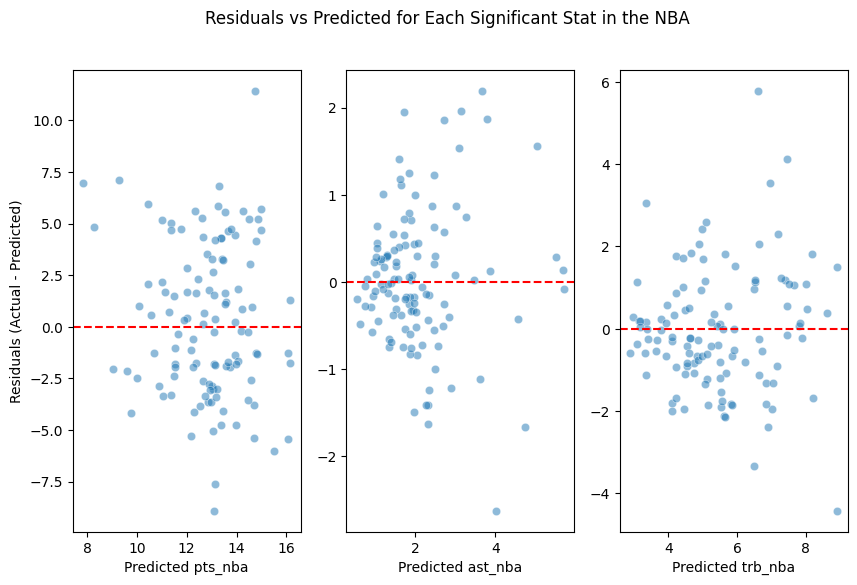

In [277]:
fig, axes = plt.subplots(1, 3, figsize = (10, 6))

sns.scatterplot(x = comparison_df['pts_nba_predicted'], y = comparison_df['pts_nba_residual'], alpha = 0.5, ax = axes[0])
axes[0].axhline(0, color='red', linestyle='--')  # Zero line
axes[0].set_xlabel('Predicted pts_nba')
axes[0].set_ylabel('Residuals (Actual - Predicted)')

sns.scatterplot(x = comparison_df['ast_nba_predicted'], y = comparison_df['ast_nba_residual'], alpha = 0.5, ax = axes[1])
axes[1].axhline(0, color='red', linestyle='--') 
axes[1].set_xlabel('Predicted ast_nba')
axes[1].set_ylabel('')


sns.scatterplot(x = comparison_df['trb_nba_predicted'], y = comparison_df['trb_nba_residual'], alpha = 0.5, ax = axes[2])
axes[2].axhline(0, color='red', linestyle='--') 
axes[2].set_xlabel('Predicted trb_nba')
axes[2].set_ylabel('')


# sns.scatterplot(x = comparison_df['impact_score_nba_predicted'], y = comparison_df['impact_score_nba_residual'], alpha = 0.5, ax = axes[3])
# axes[3].axhline(0, color='red', linestyle='--')
# axes[3].set_xlabel('Predicted impact_score_nba')
# axes[3].set_ylabel('')

plt.suptitle('Residuals vs Predicted for Each Significant Stat in the NBA')


plt.show()

In [281]:
residuals_df.describe()

,pts_nba_residual,ast_nba_residual,trb_nba_residual,orb_nba_residual,drb_nba_residual,stl_nba_residual,blk_nba_residual,tov_nba_residual,mp_nba_residual,fg_nba_residual,fga_nba_residual,ft_nba_residual,fta_nba_residual
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.315072,0.026920,-0.052774,-0.027225,-0.052903,0.028297,0.018565,0.001224,0.347178,0.142818,0.201272,-0.029967,-0.063507
std,3.716788,0.805075,1.485633,0.527574,1.105436,0.301676,0.445469,0.567136,4.858684,1.301079,2.528761,1.004400,1.274964
min,-8.905450,-2.627900,-4.424100,-1.278400,-3.175600,-0.665700,-1.119000,-1.229950,-13.445400,-2.861300,-6.490400,-2.377700,-3.002333
25%,-2.520081,-0.412475,-0.920731,-0.346725,-0.735325,-0.218142,-0.187177,-0.407812,-3.032213,-0.883938,-1.605858,-0.738894,-0.954719
50%,0.199825,-0.017250,-0.234937,-0.070223,-0.179583,-0.014269,-0.030450,0.001088,0.989350,0.102575,0.068495,-0.109825,-0.243158
75%,3.277230,0.407437,0.881654,0.315765,0.478692,0.236845,0.147450,0.353500,3.921048,1.075661,2.146825,0.592925,0.698350
max,11.443600,2.194375,5.787100,1.733600,3.610140,0.949833,2.649100,1.465500,10.360000,4.132800,6.172650,3.305167,4.415933


Looks like there's a random scatter for the three main component stats and the ultimate impact score plot. Meaning that my models aren't overestimating nor underestimating. 

In [250]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [251]:
# different methods to measure how well the model is doing.

# tells us how far off our predictions are, on average.
# The lower the RMSE, the better the model's predictions are. A smaller number means predictions are closer to the true values.
rmse = mean_squared_error(y_test, predictions, squared=False)

# tells us the average amount the model's predictions are off, but without caring too much about big errors (outliers).
# A smaller MAE is better, as it shows the predictions are closer to the actual values.
mae = mean_absolute_error(y_test, predictions)

# tells us how well the model can explain the variability (differences) in the actual NBA stats based on the college stats.
# R² values closer to 1 mean the model is doing a good job explaining the stats, and values closer to 0 mean it's not doing well.
r2 = r2_score(y_test, predictions)


print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Root Mean Squared Error (RMSE): 1.5296499670655568
Mean Absolute Error (MAE): 1.2320339066776138
R² Score: 0.34636581773971165


In [252]:
import pandas as pd
import numpy as np
import pickle

# Assuming you already have your trained model (replace with actual loading code)
def load_model(model_filename='nba_predictor_model.pkl'):
    try:
        with open(model_filename, 'rb') as model_file:
            model = pickle.load(model_file)
        print(f"Model loaded successfully from {model_filename}")
        return model
    except FileNotFoundError:
        print(f"Error: The model file {model_filename} does not exist.")
        return None

In [286]:
# Function to predict NBA stats for multiple players in a DataFrame
def predict_nba_stats_df(players_df):
    """
    Predict NBA stats for multiple players based on a DataFrame.
    players_df: DataFrame with player stats
    returns DataFrame with predicted NBA stats and impact classification
    """
    model = load_model()
    if model is None:
        return None  # Exit if the model can't be loaded

    # Drop player_name column for prediction, as it's not a numeric feature
    input_data = players_df.drop(columns=['player_name'])

    # Make predictions
    predictions = model.predict(input_data)

    # Create a DataFrame for predictions
    prediction_df = pd.DataFrame(predictions, columns=[
    'pts_nba', 'ast_nba', 'trb_nba', 'orb_nba',
    'drb_nba', 'stl_nba', 'blk_nba', 'tov_nba', 'mp_nba', 'fg_nba',
    'fga_nba', 'ft_nba', 'fta_nba'
])


    # Calculate impact scores for NBA predictions
    prediction_df['impact_score_nba'] = (
        prediction_df['pts_nba'] 
        + prediction_df['fg_nba'] 
        + prediction_df['ft_nba'] 
        - prediction_df['fga_nba'] 
        - prediction_df['fta_nba'] 
        + prediction_df['drb_nba'] 
        + (0.5 * prediction_df['orb_nba'])
        + prediction_df['ast_nba'] 
        + prediction_df['stl_nba'] 
        + (0.5 * prediction_df['blk_nba'])
        - prediction_df['tov_nba']
    )

    # Classify impact scores into tiers
    def classify_impact(score):
        if score > 15.6:
            return 'Elite'
        elif 9.77 < score < 15.6:
            return 'High Impact'
        elif 5.49 < score < 9.77:
            return 'Medium Impact'
        else:
            return 'Low Impact'

    prediction_df['Impact Tier'] = prediction_df['impact_score_nba'].apply(classify_impact)

    # Add player names to predictions
    prediction_df['player_name'] = players_df['player_name'].values

    return prediction_df

Have input be dictionary key that is a player, stats are already pre assigned to players in that dictionary.

In [274]:
players_df = pd.DataFrame({
    'player_name': ['Player A', 'Player B', 'Player C'],
    'pts_college': [20, 15, 0],
    'ast_college': [5, 3, 0],
    'trb_college': [7, 6, 0],
    'drb_college': [1, 4, 0],
    'orb_college': [0, 2, 0],
    'stl_college': [0, 2, 0],
    'blk_college': [1, 1, 0],
    'tov_college': [3, 4, 0],
    'mp_college': [25, 30, 0],
    'fg_college': [2, 6, 0],
    'fga_college': [4, 14, 0],
    'ft_college': [2, 4, 0],
    'fta_college': [7, 6, 0]
})

In [275]:
players_df

,player_name,pts_college,ast_college,trb_college,drb_college,orb_college,stl_college,blk_college,tov_college,mp_college,fg_college,fga_college,ft_college,fta_college
0,Player A,20,5,7,1,0,0,1,3,25,2,4,2,7
1,Player B,15,3,6,4,2,2,1,4,30,6,14,4,6
2,Player C,0,0,0,0,0,0,0,0,0,0,0,0,0


In [276]:
predicted_stats_df = predict_nba_stats_df(players_df)
predicted_stats_df

Model loaded successfully from nba_predictor_model.pkl


,pts_nba,ast_nba,trb_nba,orb_nba,drb_nba,stl_nba,blk_nba,tov_nba,mp_nba,fg_nba,fga_nba,ft_nba,fta_nba,impact_score_nba,Impact Tier,player_name
0,14.545208,4.817076,4.0200,0.683733,4.08305,0.962508,1.3205,2.689267,27.53835,4.8735,8.6536,4.7630,5.6595,18.044093,Elite,Player A
1,15.433300,2.401500,8.1764,2.561900,5.29330,1.779600,1.6735,3.379200,28.02070,5.6199,9.5513,3.8607,5.9136,17.661900,Elite,Player B
2,9.828200,1.849600,4.0832,1.201100,3.04370,0.783400,0.3507,1.436000,20.53930,3.7870,7.5148,1.4323,1.7005,10.848800,High Impact,Player C


<Axes: xlabel='impact_score', ylabel='Count'>

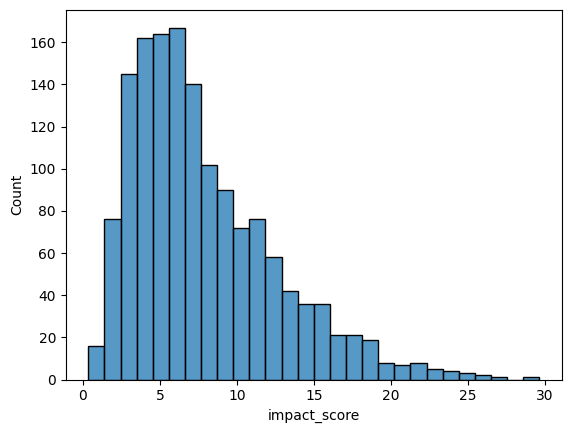

In [279]:
sns.histplot(NBA_first_four_df['impact_score'])

## Reflection
### 1. **Understanding Metrics & Residuals**:
My RMSE, MAE, R^2  and residual analysis are giving me mixed signals:
  
  **Low R^2**: Indicates that the model may not explain much of the variance in the data. However, since NBA stats are inherently difficult to predict, I thought that a low R^2 might be acceptable.
  
  **Residual plots**: My random distribution suggested that the model isn’t systematically biased, which is good, but based on the final predictions I made, I can see that it doesn’t guarantee high predictive power.

### 2. **Understanding How My Data is Currently Set Up**
My predictions are flawed is because of multiple reasons: 

**a)** Huge skew of low impact players in the NBA. It made the model overly focused on predicting low-impact players correctly. Thereby reducing sensitivity to high, medium, or elite players, leading to misclassification. While I did account for players who didn't average more than 20 games in order to get rid of outlier one-off performances, I could have been more strict with my cleaning. The average amount of games played in the NBA in the dataset was around 50 games. I could have got rid of a huge segment of players that averaged below that but I figured I also wanted to predict whether or not college players would end up being benchwarmers who didn't play many games. I also didn't want to get rid of too much data since my machine learning models had limited data to train as is. Somehow, I will need to find a healthy balance. 

**b)** My dataset accounts for players all the way from 2003. The game has changed in the past two decades. The NBA has shifted towards faster, perimeter-oriented play with a heavier focus on 3-point shooting. This changes the weight of stats like field goals or assists in predicting impact. Also, players from older eras may not align with current trends, affecting the model's predictive accuracy for modern players.


### 3. **How I Will Move Forward**:

**Data Selection & Cleaning**: On my next iteration, I believe I should just use players from the past decade. That way statistics aren't inflated towards the backhalf of my dataset. In turn, the distribution of statistics and impact scores should be more accurate when being fed to my machine learning model.

**Feature engineering**: Add features like player position, team performance, or historical trends.

Alternative models

Combine Models

  